In [51]:
import qubic.pygsti.qupig as qupig
from importlib import reload
import pygsti
import qubic.job_manager_jpm as job_manager
from pygsti.models import modelconstruction as _mc
import chipcalibration.rpe as _rpe
import chipcalibration.config as cfg
import numpy as np

In [52]:
reload(_rpe)

<module 'chipcalibration.rpe' from '/home/jpmarceaux/PycharmProjects/chipcalibration/chipcalibration/rpe.py'>

In [53]:
# make the processor spec
register = ['Q2'] # these correspond to the actual qubit id's on the qubic device
gate_names = ['Gxpi2', 'Gzpi2']

availability = {
    'Gxpi2': [(qid, ) for qid in register],
    'Gzpi2': [(qid, ) for qid in register],
}

pspec = pygsti.processors.QubitProcessorSpec(num_qubits=len(register), gate_names=gate_names,
                                 availability=availability, qubit_labels=register)

In [54]:
# make a pygsti simulation manager
model = _mc.create_explicit_model(pspec)
model.set_all_parameterizations('TP')
model = model.depolarize(0.1)
sim_manager = job_manager.SimulationManager(model)

In [55]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

In [56]:
rpe = _rpe.RpeX90(pspec, register[0], 13)

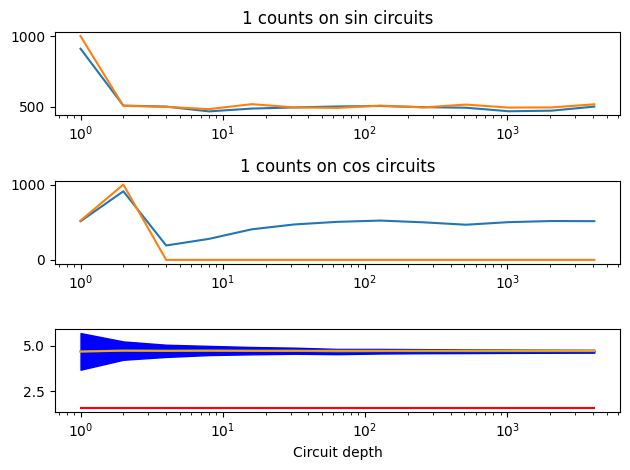

Last good generation: 5
Estimated phase: 4.716672298331883


In [57]:
results = rpe.run_and_report(sim_manager, 1000, qchip)

In [58]:
results.angle_estimates

array([4.68076935, 4.72333614, 4.71077088, 4.7303636 , 4.72032478,
       4.7166723 , 4.67174565, 4.68992538, 4.69217009, 4.68819656,
       4.68941076, 4.68887349, 4.68864692])